In [34]:
from bs4 import BeautifulSoup
import requests
import wbgapi as wb
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#to see all available libraries
data = wb.series.info()
print(data)

id                          value
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2 

In [36]:
from datetime import datetime
data_date = (datetime(2018,1,1),datetime(2024,12,31))
data_date


(datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2024, 12, 31, 0, 0))

In [37]:
data = wb.series.info(q='inflation') #to see the available libraries for a search term using q
print(data)


id                    value
--------------------  -------------------------------------------------
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
NY.GDP.DEFL.KD.ZG     Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG.AD  Inflation, GDP deflator: linked series (annual %)
                      3 elements


In [38]:
data = wb.series.info(q='population growth') #to see the available libraries for a search term using q
print(data)

id              value
--------------  ----------------------------------
SP.POP.GROW     Population growth (annual %)
SP.RUR.TOTL.ZG  Rural population growth (annual %)
SP.URB.GROW     Urban population growth (annual %)
                3 elements


In [39]:
data = wb.series.info(q='country') #to see the available libraries for a search term using q
print(data)

id                 value
-----------------  ----------------------------------------------------------------------------------
SI.RMT.COST.IB.ZS  Average transaction cost of sending remittances to a specific country (%)
SI.RMT.COST.OB.ZS  Average transaction cost of sending remittances from a specific country (%)
SM.POP.ASYS.EA     Asylum-seekers by country or territory of asylum
SM.POP.ASYS.EO     Asylum-seekers by country or territory of origin
SM.POP.IDPC        Internally displaced people (IDP) by country or territory of asylum / origin
SM.POP.OPIP.EA     Other people in need of international protection by country or territory of asylum
SM.POP.OPIP.EO     Other people in need of international protection by country or territory of origin
SM.POP.RHCR.EA     Refugees under the mandate of the UNHCR by country or territory of asylum
SM.POP.RHCR.EO     Refugees under the mandate of the UNHCR by country or territory of origin
SM.POP.RRWA.EA     Refugees under the mandate of the UNRWA by c

In [40]:
data = wb.series.info(q='poverty') #to see the available libraries for a search term using q
print(data)

id              value
--------------  ---------------------------------------------------------------------------------------------------------------------------------------------
SE.LPV.PRIM     Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.FE  Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.MA  Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SH.UHC.FBP1.ZS  Proportion of population pushed further below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBP2.ZS  Proportion of population pushed further below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBPR.ZS  Proportion of population pushed further below the 60%

In [41]:
data = wb.series.info(q='Unemployment') #to see the available libraries for a search term using q
print(data)

id                        value
------------------------  ------------------------------------------------------------------------------------------------------
per_lm_alllm.adq_pop_tot  Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)
per_lm_alllm.ben_q1_tot   Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)
per_lm_alllm.cov_pop_tot  Coverage of unemployment benefits and ALMP (% of population)
per_lm_alllm.cov_q1_tot   Coverage of unemployment benefits and ALMP in poorest quintile (% of population)
per_lm_alllm.cov_q2_tot   Coverage of unemployment benefits and ALMP in 2nd quintile (% of population)
per_lm_alllm.cov_q3_tot   Coverage of unemployment benefits and ALMP in 3rd quintile (% of population)
per_lm_alllm.cov_q4_tot   Coverage of unemployment benefits and ALMP in 4th quintile (% of population)
per_lm_alllm.cov_q5_tot   Coverage of unemployment benefits and ALMP in richest quintile (% o

In [10]:
data = wb.series.info(q='GDP') #to see the available libraries for a search term using q
print(data)

id                       value
-----------------------  -------------------------------------------------------------------------
EG.GDP.PUSE.KO.PP        GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD     GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD     Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)
EN.GHG.CO2.RT.GDP.KD     Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP)
EN.GHG.CO2.RT.GDP.PP.KD  Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)
NY.GDP.DEFL.KD.ZG        Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG.AD     Inflation, GDP deflator: linked series (annual %)
NY.GDP.DEFL.ZS           GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD        GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN           Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN           Discrepancy in expenditure est

In [11]:
data = wb.series.info(q='GNI') #to see the available libraries for a search term using q
print(data)

id                 value
-----------------  ---------------------------------------------------
NY.GNP.ATLS.CD     GNI, Atlas method (current US$)
NY.GNP.MKTP.CD     GNI (current US$)
NY.GNP.MKTP.CN     GNI (current LCU)
NY.GNP.MKTP.CN.AD  GNI: linked series (current LCU)
NY.GNP.MKTP.KD     GNI (constant 2015 US$)
NY.GNP.MKTP.KD.ZG  GNI growth (annual %)
NY.GNP.MKTP.KN     GNI (constant LCU)
NY.GNP.MKTP.PP.CD  GNI, PPP (current international $)
NY.GNP.MKTP.PP.KD  GNI, PPP (constant 2021 international $)
NY.GNP.PCAP.CD     GNI per capita, Atlas method (current US$)
NY.GNP.PCAP.CN     GNI per capita (current LCU)
NY.GNP.PCAP.KD     GNI per capita (constant 2015 US$)
NY.GNP.PCAP.KD.ZG  GNI per capita growth (annual %)
NY.GNP.PCAP.KN     GNI per capita (constant LCU)
NY.GNP.PCAP.PP.CD  GNI per capita, PPP (current international $)
NY.GNP.PCAP.PP.KD  GNI per capita, PPP (constant 2021 international $)
                   16 elements


In [30]:
data = wb.series.info(q='Education') #to see the available libraries for a search term using q
print(data)

id                    value
--------------------  --------------------------------------------------------------------------------------------------------------------------------------------
FX.OWN.TOTL.PL.ZS     Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)
FX.OWN.TOTL.SO.ZS     Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+)
NY.ADJ.AEDU.CD        Adjusted savings: education expenditure (current US$)
NY.ADJ.AEDU.GN.ZS     Adjusted savings: education expenditure (% of GNI)
SE.COM.DURS           Compulsory education, duration (years)
SE.PRE.DURS           Preprimary education, duration (years)
SE.PRE.TCAQ.FE.ZS     Trained teachers in preprimary education, female (% of female teachers)
SE.PRE.TCAQ.MA.ZS     Trained teachers in preprimary education, male (% of male teachers)
SE.PRE.TCAQ.ZS        Trained 

In [31]:
data = wb.series.info(q='Gross capital') #to see the available libraries for a search term using q
print(data)

id                 value
-----------------  -------------------------------------------
NE.GDI.TOTL.CD     Gross capital formation (current US$)
NE.GDI.TOTL.CN     Gross capital formation (current LCU)
NE.GDI.TOTL.KD     Gross capital formation (constant 2015 US$)
NE.GDI.TOTL.KD.ZG  Gross capital formation (annual % growth)
NE.GDI.TOTL.KN     Gross capital formation (constant LCU)
NE.GDI.TOTL.ZS     Gross capital formation (% of GDP)
                   6 elements


In [33]:
data = wb.series.info(q='Primary income') #to see the available libraries for a search term using q
print(data)

id              value
--------------  ----------------------------------------------------------------
BM.GSR.FCTY.CD  Primary income payments (BoP, current US$)
BM.GSR.TOTL.CD  Imports of goods, services and primary income (BoP, current US$)
BN.GSR.FCTY.CD  Net primary income (BoP, current US$)
BX.GSR.FCTY.CD  Primary income receipts (BoP, current US$)
BX.GSR.TOTL.CD  Exports of goods, services and primary income (BoP, current US$)
NY.GSR.NFCY.CD  Net primary income (Net income from abroad) (current US$)
NY.GSR.NFCY.CN  Net primary income (Net income from abroad) (current LCU)
NY.GSR.NFCY.KN  Net primary income (Net income from abroad) (constant LCU)
                8 elements


In [34]:
data = wb.series.info(q='Life expectancy') #to see the available libraries for a search term using q
print(data)

id                 value
-----------------  ----------------------------------------
SP.DYN.LE00.FE.IN  Life expectancy at birth, female (years)
SP.DYN.LE00.IN     Life expectancy at birth, total (years)
SP.DYN.LE00.MA.IN  Life expectancy at birth, male (years)
                   3 elements


In [35]:
data = wb.series.info(q='Literacy rate') #to see the available libraries for a search term using q
print(data)

id                    value
--------------------  ------------------------------------------------------------
SE.ADT.1524.LT.FE.ZS  Literacy rate, youth female (% of females ages 15-24)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT.1524.LT.MA.ZS  Literacy rate, youth male (% of males ages 15-24)
SE.ADT.1524.LT.ZS     Literacy rate, youth total (% of people ages 15-24)
SE.ADT.LITR.FE.ZS     Literacy rate, adult female (% of females ages 15 and above)
SE.ADT.LITR.MA.ZS     Literacy rate, adult male (% of males ages 15 and above)
SE.ADT.LITR.ZS        Literacy rate, adult total (% of people ages 15 and above)
                      7 elements


In [36]:
data = wb.series.info(q='Poverty') #to see the available libraries for a search term using q
print(data)

id              value
--------------  ---------------------------------------------------------------------------------------------------------------------------------------------
SE.LPV.PRIM     Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.FE  Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.MA  Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SH.UHC.FBP1.ZS  Proportion of population pushed further below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBP2.ZS  Proportion of population pushed further below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBPR.ZS  Proportion of population pushed further below the 60%

In [37]:
data = wb.series.info(q='Government expenditure on education') #to see the available libraries for a search term using q
print(data)

id                 value
-----------------  ------------------------------------------------------------------------
SE.XPD.TOTL.GB.ZS  Government expenditure on education, total (% of government expenditure)
SE.XPD.TOTL.GD.ZS  Government expenditure on education, total (% of GDP)
                   2 elements


In [42]:
#to iterate through the list
data = wb.series.list(q='inflation')

for id in data:
    print(id)


{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, consumer prices (annual %)'}
{'id': 'NY.GDP.DEFL.KD.ZG', 'value': 'Inflation, GDP deflator (annual %)'}
{'id': 'NY.GDP.DEFL.KD.ZG.AD', 'value': 'Inflation, GDP deflator: linked series (annual %)'}


In [43]:
start_year = data_date[0].year
end_year = data_date[1].year

wb.data.DataFrame(
    'FP.CPI.TOTL.ZG',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()


,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,28.240495,20.212493,2.818351,3.466373,4.530613,28.270590,21.037746,22.848328,0.985257,4.239039,33.242097,1.770292,0.804503,3.323381,4.361152
1,2023,2023,13.644102,26.941484,5.067615,4.387117,7.382814,33.884776,30.218828,38.106966,6.091142,5.879935,24.659550,19.789547,5.939478,5.350948,6.075244
2,2022,2022,21.355290,18.800879,11.665567,5.276167,6.247677,13.895661,33.889880,31.255895,6.657042,6.081281,18.847188,17.689210,9.696819,7.195789,7.039873
3,2021,2021,25.754295,8.404538,7.240978,4.091952,2.271858,5.214049,26.839522,9.971089,1.401959,3.616905,16.952846,-0.391347,2.180323,2.204572,4.618745
4,2020,2020,22.271539,7.321106,1.890359,2.425007,2.437609,5.044933,20.356347,9.887290,0.705969,2.209382,13.246023,9.850399,2.543147,3.313323,3.232388
5,2019,2019,17.080954,-0.686772,2.772864,-1.106863,2.452802,9.152800,15.809632,7.143640,0.303386,3.722394,11.396422,3.347877,1.760112,2.867588,4.102851
6,2018,2018,19.628938,-2.814698,3.238016,0.359409,1.068858,14.401466,13.833036,7.808765,1.803917,4.291591,12.095107,-0.311210,0.460986,2.616012,4.509873


In [44]:
start_year = data_date[0].year
end_year = data_date[1].year

wb.data.DataFrame(
    'SI.POV.NAHC',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021,NaN,NaN,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2020,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,2019,NaN,NaN,NaN,NaN,NaN,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,NaN
6,2018,2018,32.3,NaN,NaN,39.5,NaN,NaN,NaN,NaN,NaN,NaN,40.1,NaN,NaN,NaN,NaN


In [45]:
#population growth
start_year = data_date[0].year
end_year = data_date[1].year

wb.data.DataFrame(
    'SP.POP.GROW',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,3.044200,2.583934,1.635384,2.436182,2.612683,1.733242,2.583504,1.875000,0.972828,2.237152,2.082978,2.141768,2.320586,2.753732,1.249514
1,2023,2023,3.080655,2.727644,1.640317,2.503847,2.642453,1.688341,2.603624,1.908603,1.021952,2.509479,2.098389,2.198498,2.387383,2.800832,1.328101
2,2022,2022,3.143026,2.705850,1.588480,2.516229,2.629051,1.486097,2.622695,1.920290,1.008636,2.776006,2.092817,2.190466,2.467643,3.007594,1.413972
3,2021,2021,3.181323,2.724255,1.491301,2.473987,2.654961,1.490805,2.672495,1.959046,1.006918,2.953146,2.096187,2.190935,2.538489,3.217737,1.540557
4,2020,2020,3.267959,2.908653,1.439410,2.530198,2.724486,1.624954,2.710773,1.991820,1.025655,2.910199,2.130297,2.242449,2.633036,3.333418,1.622164
5,2019,2019,3.387884,3.283675,1.422628,2.619168,2.781644,1.754974,2.691240,2.007805,1.030223,2.799322,2.194402,2.280861,2.717608,3.391321,1.649575
6,2018,2018,3.453233,3.018982,1.418981,2.696968,2.770310,1.897138,2.696752,2.075171,1.103642,2.772463,2.312173,2.316307,2.800457,3.397411,1.682370


In [46]:
#unemployment
start_year = data_date[0].year
end_year = data_date[1].year

wb.data.DataFrame(
    'SL.UEM.TOTL.ZS',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()


,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,14.464,0.902,23.138,2.288,3.518,7.198,3.398,3.007,8.943,19.148,2.989,11.994,2.992,2.941,33.168
1,2023,2023,14.537,0.921,23.381,2.270,3.613,7.334,3.402,3.063,9.044,19.365,3.074,12.352,2.800,2.787,32.098
2,2022,2022,14.602,0.915,23.615,2.306,3.653,7.344,3.409,3.084,9.494,19.695,3.821,15.084,2.837,2.886,33.268
3,2021,2021,15.799,1.118,23.106,2.630,3.973,7.441,3.935,3.384,10.576,20.922,5.450,15.775,3.440,3.422,34.007
4,2020,2020,16.690,1.030,21.017,2.584,3.870,7.974,3.994,3.313,11.223,21.004,5.742,11.829,3.437,3.831,29.217
5,2019,2019,16.497,1.043,20.094,2.401,3.622,7.851,2.917,3.160,9.194,19.921,5.206,11.236,2.863,3.060,28.468
6,2018,2018,16.594,1.146,19.681,2.850,3.601,9.855,2.802,3.253,9.271,19.877,5.067,10.759,3.455,3.250,26.906


In [47]:
#poverty
start_year = data_date[0].year
end_year = data_date[1].year

wb.data.DataFrame(
    'SI.POV.NAHC',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()


,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021,NaN,NaN,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2020,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,2019,NaN,NaN,NaN,NaN,NaN,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,NaN
6,2018,2018,32.3,NaN,NaN,39.5,NaN,NaN,NaN,NaN,NaN,NaN,40.1,NaN,NaN,NaN,NaN


In [48]:
#GDP per capita growth
wb.data.DataFrame(
    'NY.GDP.PCAP.KD.ZG',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,1.292931,0.849391,-4.563455,3.400052,0.997232,0.639636,4.579668,3.721743,NaN,1.417120,1.294372,6.583267,4.440046,3.253614,-0.669087
1,2023,2023,-1.988293,-0.096964,1.528938,3.818193,0.555787,2.023158,3.854750,1.190223,2.338229,1.854449,0.724296,5.896001,1.797882,2.427595,-0.630051
2,2022,2022,-0.143628,-0.869931,3.823631,3.756021,1.045030,5.015559,2.595400,1.830512,0.496491,2.513088,1.113267,5.817733,1.319134,1.489271,0.480620
3,2021,2021,-1.969591,0.329206,10.259647,4.447092,0.631352,1.762205,2.855658,3.038003,7.060630,0.588993,1.497161,8.456009,3.873433,0.258076,3.350531
4,2020,2020,-8.672076,-2.548981,-10.033238,-1.816211,-2.434760,1.881120,3.223116,-1.468308,-8.138670,-10.737293,-3.864201,-5.516369,-1.291476,-0.423923,-7.678733
5,2019,2019,-4.010017,-1.476335,1.576391,3.962447,0.636415,3.715841,5.486641,4.390631,1.816421,-3.576492,-0.010005,6.979296,1.808923,2.889587,-1.380361
6,2018,2018,-4.665970,-1.411808,2.720714,2.053349,1.115149,3.351668,3.974075,4.018953,1.914107,-1.703427,-0.406837,6.031780,3.276158,2.753004,-0.137485


In [49]:
wb.data.DataFrame(
    'NY.GNP.PCAP.KD.ZG',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,-0.333769,NaN,NaN,8.421481,-0.507094,-1.110375,8.220368,8.942342,NaN,3.371969,NaN,11.580328,2.735030,0.912130,-1.097924
1,2023,2023,-8.511425,0.344309,-1.403123,4.839077,0.029893,0.896229,5.270025,-5.286083,2.331062,3.265162,NaN,5.426774,2.430246,1.014154,-1.319510
2,2022,2022,0.857145,1.183040,7.422166,1.970785,1.767363,4.736284,2.252510,5.404489,0.481227,7.377190,NaN,4.056123,-0.363074,2.108446,-1.090502
3,2021,2021,15.682925,-0.865779,7.339775,3.360542,2.648338,1.782964,3.986237,1.714513,6.597765,-4.081962,NaN,9.027712,2.358044,-0.630558,4.568887
4,2020,2020,-24.406433,0.836910,-4.313644,-0.009358,-3.363905,2.283085,5.769100,3.882974,-7.618726,-8.882131,NaN,-5.169844,0.803409,-0.696854,-5.172111
5,2019,2019,7.851607,0.601567,13.285665,3.850548,0.037055,2.264117,5.244603,4.650128,1.804109,-0.553817,NaN,7.077690,2.135293,4.963934,-0.047497
6,2018,2018,3.785698,-1.620849,-0.385808,1.415553,1.681328,2.633060,2.227594,5.773884,1.954966,-4.384404,NaN,4.059214,2.219275,-1.076356,-0.618909


In [92]:
wb.data.DataFrame(
    'NY.GDP.MKTP.CD',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,8.039694e+10,2.162379e+09,1.940077e+10,8.653841e+10,5.132676e+10,3.890599e+11,NaN,8.282529e+10,1.544310e+11,1.337235e+10,1.877597e+11,1.425164e+10,3.226725e+10,5.365187e+10,4.002607e+11
1,2023,2023,8.487516e+10,2.629392e+09,1.941127e+10,7.961806e+10,4.927941e+10,3.959261e+11,NaN,8.054715e+10,1.444171e+11,1.240827e+10,3.638463e+11,1.433172e+10,3.069633e+10,4.876896e+10,3.806993e+11
2,2022,2022,1.043997e+11,3.338723e+09,2.032115e+10,7.092282e+10,4.434721e+10,4.767477e+11,1.267727e+11,7.391900e+10,1.309519e+11,1.256945e+10,4.774034e+11,1.331616e+10,2.778333e+10,4.556533e+10,4.069200e+11
3,2021,2021,6.650513e+10,2.775799e+09,1.875018e+10,7.279464e+10,4.501194e+10,4.246718e+11,1.112619e+11,7.951420e+10,1.420221e+11,1.240249e+10,4.408336e+11,1.107879e+10,2.752078e+10,4.052979e+10,4.208869e+11
4,2020,2020,4.850156e+10,2.649680e+09,1.496025e+10,6.302785e+10,4.077324e+10,3.838178e+11,1.076577e+11,7.000824e+10,1.213536e+11,1.058375e+10,4.321989e+11,1.017439e+10,2.453051e+10,3.760037e+10,3.379747e+11
5,2019,2019,7.089796e+10,2.576519e+09,1.672591e+10,6.038289e+10,3.966776e+10,3.186788e+11,9.591262e+10,6.835263e+10,1.289203e+11,1.254193e+10,4.745175e+11,1.034930e+10,2.340400e+10,3.535306e+10,3.893300e+11
6,2018,2018,7.945069e+10,2.667182e+09,1.703194e+10,5.852248e+10,3.995555e+10,2.625886e+11,8.426918e+10,6.725935e+10,1.273411e+11,1.368202e+10,4.217393e+11,9.637905e+09,2.311670e+10,3.292703e+10,4.052607e+11


In [50]:
wb.data.DataFrame(
    'NE.GDI.TOTL.CD',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,2.010050e+10,NaN,7.021614e+09,2.118143e+10,1.097336e+10,5.056511e+10,NaN,8.246546e+09,4.619799e+10,3.425126e+09,NaN,3.693192e+09,1.061205e+10,1.196888e+10,5.580516e+10
1,2023,2023,2.018254e+10,3.431476e+08,5.880814e+09,2.077753e+10,9.617690e+09,6.529112e+10,NaN,7.974056e+09,4.161955e+10,3.475867e+09,NaN,3.380212e+09,1.287001e+10,1.112713e+10,5.915341e+10
2,2022,2022,2.741122e+10,4.469508e+08,5.444345e+09,1.949336e+10,8.473455e+09,9.466261e+10,3.212703e+10,1.167909e+10,3.967813e+10,2.510648e+09,NaN,3.427823e+09,1.258765e+10,1.102742e+10,6.272703e+10
3,2021,2021,1.758220e+10,3.639799e+08,5.130748e+09,1.716157e+10,8.159175e+09,7.734226e+10,3.118147e+10,1.354658e+10,4.356719e+10,2.172005e+09,NaN,2.961904e+09,1.055505e+10,9.762154e+09,5.385848e+10
4,2020,2020,1.284826e+10,3.032821e+08,4.896080e+09,1.370408e+10,7.200776e+09,7.222707e+10,3.292062e+10,1.275807e+10,3.492191e+10,1.474232e+09,NaN,2.414856e+09,8.740949e+09,9.105287e+09,4.172481e+10
5,2019,2019,1.255763e+10,3.640286e+08,5.154999e+09,1.327816e+10,7.510949e+09,6.582005e+10,3.382260e+10,1.274590e+10,3.944307e+10,1.922566e+09,NaN,2.797283e+09,7.481242e+09,9.025446e+09,6.159510e+10
6,2018,2018,1.419738e+10,2.961495e+08,4.411764e+09,1.302288e+10,7.806528e+09,5.415869e+10,2.878884e+10,1.460156e+10,4.092689e+10,2.040857e+09,NaN,2.151392e+09,7.547127e+09,8.010684e+09,6.553302e+10


In [51]:
wb.data.DataFrame(
    'BX.KLT.DINV.CD.WD',
    ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR'],
    range(start_year, end_year + 1),
    index='time',
    numericTimeKeys=True,
    labels=True
).reset_index()

,time,Time,AGO,BDI,BWA,CIV,CMR,EGY,ETH,GHA,MAR,NAM,NGA,RWA,SEN,UGA,ZAF
0,2024,2024,-1.357889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.060784e+09,1.080311e+09,NaN,NaN,NaN,2.424808e+09
1,2023,2023,-2.119632e+09,3.412798e+07,6.654176e+08,1.752557e+09,8.215464e+08,9.840600e+09,3.262966e+09,1.319316e+09,1.095981e+09,2.294376e+09,1.872521e+09,4.591664e+08,4.789997e+09,2.991180e+09,3.442332e+09
2,2022,2022,-6.598653e+09,2.528599e+07,7.096241e+08,1.599116e+09,9.256815e+08,1.139990e+10,3.669991e+09,1.428412e+09,2.294356e+09,1.056044e+09,-1.867924e+08,3.051019e+08,2.928676e+09,2.952960e+09,9.238991e+09
3,2021,2021,-4.355117e+09,2.237744e+07,-3.190559e+08,1.392435e+09,9.635315e+08,5.122300e+09,4.259446e+09,2.533586e+09,2.264149e+09,8.402869e+08,3.313210e+09,2.118961e+08,2.588127e+09,1.648240e+09,4.065879e+10
4,2020,2020,-1.866468e+09,2.122621e+07,3.179261e+07,7.129159e+08,6.751870e+08,5.851800e+09,2.395800e+09,1.875783e+09,1.418713e+09,-1.501728e+08,2.385278e+09,1.526141e+08,1.845665e+09,1.191480e+09,3.153553e+09
5,2019,2019,-4.098479e+09,3.028971e+07,9.360713e+07,8.488811e+08,1.024779e+09,9.010100e+09,2.548743e+09,3.879831e+09,1.720825e+09,-1.764783e+08,2.305100e+09,2.631723e+08,1.065461e+09,1.303000e+09,5.116098e+09
6,2018,2018,-6.456076e+09,6.663532e+06,2.859551e+08,6.203307e+08,7.650920e+08,8.141300e+09,3.360419e+09,2.989035e+09,3.544387e+09,2.343727e+08,7.752474e+08,3.661923e+08,8.478416e+08,1.055353e+09,5.569462e+09


In [52]:
# Dictionary of indicators {The_name: World Bank code}
indicators = {
    'consumerprice_inflation': 'FP.CPI.TOTL.ZG',   # Consumer price inflation (annual %)
    'population_growth': 'SP.POP.GROW',        # Population growth
    'Total_Unemployment': 'SL.UEM.TOTL.ZS',         # Poverty headcount ratio at $3/day (2021 PPP)
    'poverty_headcount': 'SI.POV.NAHC',         # Poverty headcount 
    'GDP':'NY.GDP.MKTP.CD',                      #GDP
    'GDP growth%': 'NY.GDP.PCAP.KD.ZG',        # GDP growth%
    'GNI':'NY.GNP.MKTP.CD',                     #GNI
    'GNI growth%':'NY.GNP.PCAP.KD.ZG' ,         #GNI
    'GCF':'NE.GDI.TOTL.CD',                     #GCF
    'FDI':'BX.KLT.DINV.CD.WD',                  #FDI
    'Adult Literacy':'SE.ADT.LITR.ZS',          #Adult literacy
    'Life expectancy':'SP.DYN.LE00.IN',         #Life expectancy
    'Education':'SE.XPD.TOTL.GB.ZS'    #Government expenditure on education


}

In [53]:

countries = ['GHA','ETH','MAR','NAM','UGA','CIV','BDI','SEN','ZAF','AGO','EGY','RWA','NGA','BWA','CMR']  # you can use 'all' for all countries
years = range(start_year, end_year + 1)

# Fetch data for all indicators
df = wb.data.DataFrame(
    list(indicators.values()),
    economy=countries,
    time=years,
    labels=True,
    numericTimeKeys=True
).reset_index()

In [77]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [54]:
df

,economy,series,Country,Series,2018,2019,2020,2021,2022,2023,2024
0,CMR,FP.CPI.TOTL.ZG,Cameroon,"Inflation, consumer prices (annual %)",1.068858,2.452802,2.437609,2.271858,6.247677,7.382814,4.530613
1,BWA,FP.CPI.TOTL.ZG,Botswana,"Inflation, consumer prices (annual %)",3.238016,2.772864,1.890359,7.240978,11.665567,5.067615,2.818351
2,NGA,FP.CPI.TOTL.ZG,Nigeria,"Inflation, consumer prices (annual %)",12.095107,11.396422,13.246023,16.952846,18.847188,24.659550,33.242097
3,RWA,FP.CPI.TOTL.ZG,Rwanda,"Inflation, consumer prices (annual %)",-0.311210,3.347877,9.850399,-0.391347,17.689210,19.789547,1.770292
4,EGY,FP.CPI.TOTL.ZG,"Egypt, Arab Rep.","Inflation, consumer prices (annual %)",14.401466,9.152800,5.044933,5.214049,13.895661,33.884776,28.270590
...,...,...,...,...,...,...,...,...,...,...,...
190,UGA,SE.XPD.TOTL.GB.ZS,Uganda,"Government expenditure on education, total (% ...",11.253660,8.897107,8.528805,8.214561,8.482365,8.626472,NaN
191,NAM,SE.XPD.TOTL.GB.ZS,Namibia,"Government expenditure on education, total (% ...",23.324303,29.056196,24.941381,25.135489,25.321541,24.969549,NaN
192,MAR,SE.XPD.TOTL.GB.ZS,Morocco,"Government expenditure on education, total (% ...",22.444761,21.465071,24.158094,23.756483,23.865665,22.825520,NaN
193,ETH,SE.XPD.TOTL.GB.ZS,Ethiopia,"Government expenditure on education, total (% ...",22.991756,20.922203,22.447720,23.562042,23.006403,NaN,NaN


In [55]:
df_melted = df.melt(
    id_vars=['economy', 'series', 'Country', 'Series'],  # keep these as identifiers
    var_name='year',        # the column that will hold the years
    value_name='value'      # the column that will hold the numbers
)


In [56]:
df_melted

,economy,series,Country,Series,year,value
0,CMR,FP.CPI.TOTL.ZG,Cameroon,"Inflation, consumer prices (annual %)",2018,1.068858
1,BWA,FP.CPI.TOTL.ZG,Botswana,"Inflation, consumer prices (annual %)",2018,3.238016
2,NGA,FP.CPI.TOTL.ZG,Nigeria,"Inflation, consumer prices (annual %)",2018,12.095107
3,RWA,FP.CPI.TOTL.ZG,Rwanda,"Inflation, consumer prices (annual %)",2018,-0.311210
4,EGY,FP.CPI.TOTL.ZG,"Egypt, Arab Rep.","Inflation, consumer prices (annual %)",2018,14.401466
...,...,...,...,...,...,...
1360,UGA,SE.XPD.TOTL.GB.ZS,Uganda,"Government expenditure on education, total (% ...",2024,NaN
1361,NAM,SE.XPD.TOTL.GB.ZS,Namibia,"Government expenditure on education, total (% ...",2024,NaN
1362,MAR,SE.XPD.TOTL.GB.ZS,Morocco,"Government expenditure on education, total (% ...",2024,NaN
1363,ETH,SE.XPD.TOTL.GB.ZS,Ethiopia,"Government expenditure on education, total (% ...",2024,NaN


In [57]:
df_melted = df_melted.rename(columns={
    "economy": "Country_code",
    "series": "indicator ID",
    "Series":  "Indicator name"
})
df_melted

,Country_code,indicator ID,Country,Indicator name,year,value
0,CMR,FP.CPI.TOTL.ZG,Cameroon,"Inflation, consumer prices (annual %)",2018,1.068858
1,BWA,FP.CPI.TOTL.ZG,Botswana,"Inflation, consumer prices (annual %)",2018,3.238016
2,NGA,FP.CPI.TOTL.ZG,Nigeria,"Inflation, consumer prices (annual %)",2018,12.095107
3,RWA,FP.CPI.TOTL.ZG,Rwanda,"Inflation, consumer prices (annual %)",2018,-0.311210
4,EGY,FP.CPI.TOTL.ZG,"Egypt, Arab Rep.","Inflation, consumer prices (annual %)",2018,14.401466
...,...,...,...,...,...,...
1360,UGA,SE.XPD.TOTL.GB.ZS,Uganda,"Government expenditure on education, total (% ...",2024,NaN
1361,NAM,SE.XPD.TOTL.GB.ZS,Namibia,"Government expenditure on education, total (% ...",2024,NaN
1362,MAR,SE.XPD.TOTL.GB.ZS,Morocco,"Government expenditure on education, total (% ...",2024,NaN
1363,ETH,SE.XPD.TOTL.GB.ZS,Ethiopia,"Government expenditure on education, total (% ...",2024,NaN


In [58]:
with pd.ExcelWriter(r"C:\Users\PC\Documents\Updated Socio-economic parameter data2.xlsx") as writer:
    df_melted.to_excel(writer, index=False)


In [59]:
df_new=df_melted.drop(columns="indicator ID")
df_new

,Country_code,Country,Indicator name,year,value
0,CMR,Cameroon,"Inflation, consumer prices (annual %)",2018,1.068858
1,BWA,Botswana,"Inflation, consumer prices (annual %)",2018,3.238016
2,NGA,Nigeria,"Inflation, consumer prices (annual %)",2018,12.095107
3,RWA,Rwanda,"Inflation, consumer prices (annual %)",2018,-0.311210
4,EGY,"Egypt, Arab Rep.","Inflation, consumer prices (annual %)",2018,14.401466
...,...,...,...,...,...
1360,UGA,Uganda,"Government expenditure on education, total (% ...",2024,NaN
1361,NAM,Namibia,"Government expenditure on education, total (% ...",2024,NaN
1362,MAR,Morocco,"Government expenditure on education, total (% ...",2024,NaN
1363,ETH,Ethiopia,"Government expenditure on education, total (% ...",2024,NaN


In [60]:
df_pivoted = df_new.pivot_table(
    index=['Country', 'Country_code', 'year'],
    columns='Indicator name',
    values='value'
).reset_index()

In [61]:
df_pivoted

Indicator name,Country,Country_code,year,"Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita growth (annual %),GNI (current US$),GNI per capita growth (annual %),"Government expenditure on education, total (% of government expenditure)",Gross capital formation (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Poverty headcount ratio at national poverty lines (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Angola,AGO,2018,-6.456076e+09,7.945069e+10,-4.665970,7.331311e+10,3.785698,5.777524,1.419738e+10,19.628938,62.622,NaN,3.453233,32.3,16.594
1,Angola,AGO,2019,-4.098479e+09,7.089796e+10,-4.010017,6.448816e+10,7.851607,6.045356,1.255763e+10,17.080954,63.051,NaN,3.387884,NaN,16.497
2,Angola,AGO,2020,-1.866468e+09,4.850156e+10,-8.672076,4.414504e+10,-24.406433,5.294736,1.284826e+10,22.271539,63.116,NaN,3.267959,NaN,16.690
3,Angola,AGO,2021,-4.355117e+09,6.650513e+10,-1.969591,6.105129e+10,15.682925,6.919610,1.758220e+10,25.754295,62.958,NaN,3.181323,NaN,15.799
4,Angola,AGO,2022,-6.598653e+09,1.043997e+11,-0.143628,9.638700e+10,0.857145,6.640472,2.741122e+10,21.355290,64.246,72.400002,3.143026,NaN,14.602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Uganda,UGA,2020,1.191480e+09,3.760037e+10,-0.423923,3.683067e+10,-0.696854,8.528805,9.105287e+09,3.313323,66.410,NaN,3.333418,NaN,3.831
101,Uganda,UGA,2021,1.648240e+09,4.052979e+10,0.258076,3.964342e+10,-0.630558,8.214561,9.762154e+09,2.204572,66.450,NaN,3.217737,NaN,3.422
102,Uganda,UGA,2022,2.952960e+09,4.556533e+10,1.489271,4.459559e+10,2.108446,8.482365,1.102742e+10,7.195789,67.675,80.589996,3.007594,NaN,2.886
103,Uganda,UGA,2023,2.991180e+09,4.876896e+10,2.427595,4.754039e+10,1.014154,8.626472,1.112713e+10,5.350948,68.252,NaN,2.800832,NaN,2.787


# Exploratory Data analysis

In [62]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country                                                                   105 non-null    object 
 1   Country_code                                                              105 non-null    object 
 2   year                                                                      105 non-null    int64  
 3   Foreign direct investment, net inflows (BoP, current US$)                 94 non-null     float64
 4   GDP (current US$)                                                         103 non-null    float64
 5   GDP per capita growth (annual %)                                          104 non-null    float64
 6   GNI (current US$)                                                 

In [63]:
from warnings import filterwarnings
filterwarnings('ignore')


In [64]:
# Descriptive Stat

df_pivoted.describe().T

,count,mean,std,min,25%,50%,75%,max
Indicator name,,,,,,,,
year,105.0,2.021000e+03,2.009592e+00,2.018000e+03,2.019000e+03,2.021000e+03,2.023000e+03,2.024000e+03
"Foreign direct investment, net inflows (BoP, current US$)",94.0,2.101927e+09,4.893141e+09,-6.598653e+09,2.907418e+08,1.247240e+09,2.843538e+09,4.065879e+10
GDP (current US$),103.0,1.196687e+11,1.453702e+11,2.162379e+09,1.940602e+10,6.038289e+10,1.281307e+11,4.774034e+11
GDP per capita growth (annual %),104.0,1.109847e+00,3.610629e+00,-1.073729e+01,-4.111083e-01,1.493216e+00,3.350815e+00,1.025965e+01
GNI (current US$),103.0,1.164542e+11,1.417532e+11,2.172597e+09,1.943679e+10,5.870046e+10,1.265888e+11,4.653565e+11
GNI per capita growth (annual %),95.0,1.756690e+00,5.024249e+00,-2.440643e+01,-4.464510e-01,1.954966e+00,4.314051e+00,1.568292e+01
"Government expenditure on education, total (% of government expenditure)",79.0,1.634554e+01,6.536585e+00,4.302818e+00,1.112590e+01,1.828890e+01,2.202965e+01,2.905620e+01
Gross capital formation (current US$),95.0,2.030293e+10,2.138250e+10,2.961495e+08,5.299672e+09,1.167909e+10,3.165425e+10,9.466261e+10
"Inflation, consumer prices (annual %)",105.0,9.708394e+00,9.596196e+00,-2.814698e+00,2.772864e+00,5.939478e+00,1.440147e+01,3.810697e+01


In [65]:
df_pivoted

Indicator name,Country,Country_code,year,"Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita growth (annual %),GNI (current US$),GNI per capita growth (annual %),"Government expenditure on education, total (% of government expenditure)",Gross capital formation (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Poverty headcount ratio at national poverty lines (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Angola,AGO,2018,-6.456076e+09,7.945069e+10,-4.665970,7.331311e+10,3.785698,5.777524,1.419738e+10,19.628938,62.622,NaN,3.453233,32.3,16.594
1,Angola,AGO,2019,-4.098479e+09,7.089796e+10,-4.010017,6.448816e+10,7.851607,6.045356,1.255763e+10,17.080954,63.051,NaN,3.387884,NaN,16.497
2,Angola,AGO,2020,-1.866468e+09,4.850156e+10,-8.672076,4.414504e+10,-24.406433,5.294736,1.284826e+10,22.271539,63.116,NaN,3.267959,NaN,16.690
3,Angola,AGO,2021,-4.355117e+09,6.650513e+10,-1.969591,6.105129e+10,15.682925,6.919610,1.758220e+10,25.754295,62.958,NaN,3.181323,NaN,15.799
4,Angola,AGO,2022,-6.598653e+09,1.043997e+11,-0.143628,9.638700e+10,0.857145,6.640472,2.741122e+10,21.355290,64.246,72.400002,3.143026,NaN,14.602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Uganda,UGA,2020,1.191480e+09,3.760037e+10,-0.423923,3.683067e+10,-0.696854,8.528805,9.105287e+09,3.313323,66.410,NaN,3.333418,NaN,3.831
101,Uganda,UGA,2021,1.648240e+09,4.052979e+10,0.258076,3.964342e+10,-0.630558,8.214561,9.762154e+09,2.204572,66.450,NaN,3.217737,NaN,3.422
102,Uganda,UGA,2022,2.952960e+09,4.556533e+10,1.489271,4.459559e+10,2.108446,8.482365,1.102742e+10,7.195789,67.675,80.589996,3.007594,NaN,2.886
103,Uganda,UGA,2023,2.991180e+09,4.876896e+10,2.427595,4.754039e+10,1.014154,8.626472,1.112713e+10,5.350948,68.252,NaN,2.800832,NaN,2.787


In [66]:
df_pivoted['Foreign direct investment, net inflows (BoP, current US$)'] = df_pivoted['Foreign direct investment, net inflows (BoP, current US$)']/(10**9)
df_pivoted['GDP (current US$)'] = df_pivoted['GDP (current US$)']/(10**9)
df_pivoted['GNI (current US$)'] = df_pivoted['GNI (current US$)']/(10**9)
df_pivoted['Gross capital formation (current US$)'] = df_pivoted['Gross capital formation (current US$)']/(10**9)

In [67]:
df_pivoted.columns

Index(['Country', 'Country_code', 'year',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'GDP (current US$)', 'GDP per capita growth (annual %)',
       'GNI (current US$)', 'GNI per capita growth (annual %)',
       'Government expenditure on education, total (% of government expenditure)',
       'Gross capital formation (current US$)',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, total (years)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Population growth (annual %)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object', name='Indicator name')

In [70]:
df_pivoted

Indicator name,Country,Country_code,year,"Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita growth (annual %),GNI (current US$),GNI per capita growth (annual %),"Government expenditure on education, total (% of government expenditure)",Gross capital formation (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Poverty headcount ratio at national poverty lines (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Angola,AGO,2018,-6.456076,79.450688,-4.665970,73.313113,3.785698,5.777524,14.197378,19.628938,62.622,NaN,3.453233,32.3,16.594
1,Angola,AGO,2019,-4.098479,70.897963,-4.010017,64.488158,7.851607,6.045356,12.557628,17.080954,63.051,NaN,3.387884,NaN,16.497
2,Angola,AGO,2020,-1.866468,48.501561,-8.672076,44.145038,-24.406433,5.294736,12.848258,22.271539,63.116,NaN,3.267959,NaN,16.690
3,Angola,AGO,2021,-4.355117,66.505130,-1.969591,61.051288,15.682925,6.919610,17.582202,25.754295,62.958,NaN,3.181323,NaN,15.799
4,Angola,AGO,2022,-6.598653,104.399747,-0.143628,96.386999,0.857145,6.640472,27.411217,21.355290,64.246,72.400002,3.143026,NaN,14.602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Uganda,UGA,2020,1.191480,37.600368,-0.423923,36.830675,-0.696854,8.528805,9.105287,3.313323,66.410,NaN,3.333418,NaN,3.831
101,Uganda,UGA,2021,1.648240,40.529789,0.258076,39.643420,-0.630558,8.214561,9.762154,2.204572,66.450,NaN,3.217737,NaN,3.422
102,Uganda,UGA,2022,2.952960,45.565333,1.489271,44.595588,2.108446,8.482365,11.027422,7.195789,67.675,80.589996,3.007594,NaN,2.886
103,Uganda,UGA,2023,2.991180,48.768956,2.427595,47.540389,1.014154,8.626472,11.127131,5.350948,68.252,NaN,2.800832,NaN,2.787


In [71]:
df_pivoted.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Indicator name,,,,,,,,
year,105.0,2021.0,2.0,2018.0,2019.0,2021.0,2023.0,2024.0
"Foreign direct investment, net inflows (BoP, current US$)",94.0,2.0,5.0,-7.0,0.0,1.0,3.0,41.0
GDP (current US$),103.0,120.0,145.0,2.0,19.0,60.0,128.0,477.0
GDP per capita growth (annual %),104.0,1.0,4.0,-11.0,-0.0,1.0,3.0,10.0
GNI (current US$),103.0,116.0,142.0,2.0,19.0,59.0,127.0,465.0
GNI per capita growth (annual %),95.0,2.0,5.0,-24.0,-0.0,2.0,4.0,16.0
"Government expenditure on education, total (% of government expenditure)",79.0,16.0,7.0,4.0,11.0,18.0,22.0,29.0
Gross capital formation (current US$),95.0,20.0,21.0,0.0,5.0,12.0,32.0,95.0
"Inflation, consumer prices (annual %)",105.0,10.0,10.0,-3.0,3.0,6.0,14.0,38.0


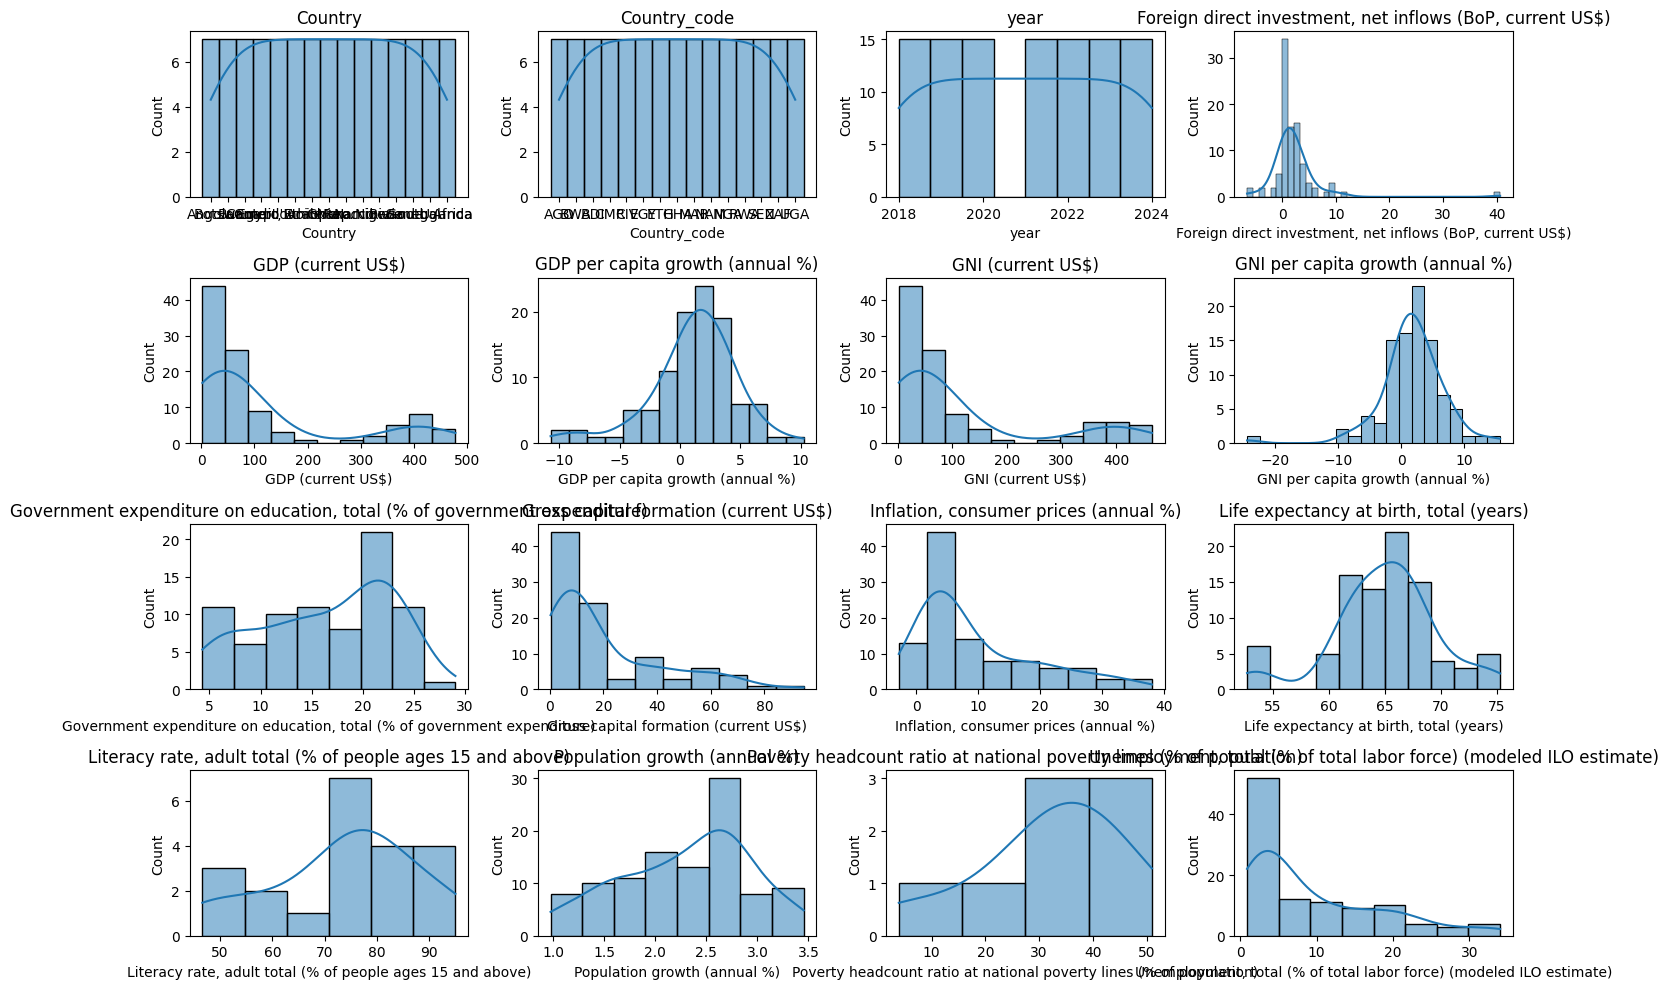

In [72]:
# distribution

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()


for i, col in enumerate(df_pivoted):
    sns.histplot(data=df_pivoted, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


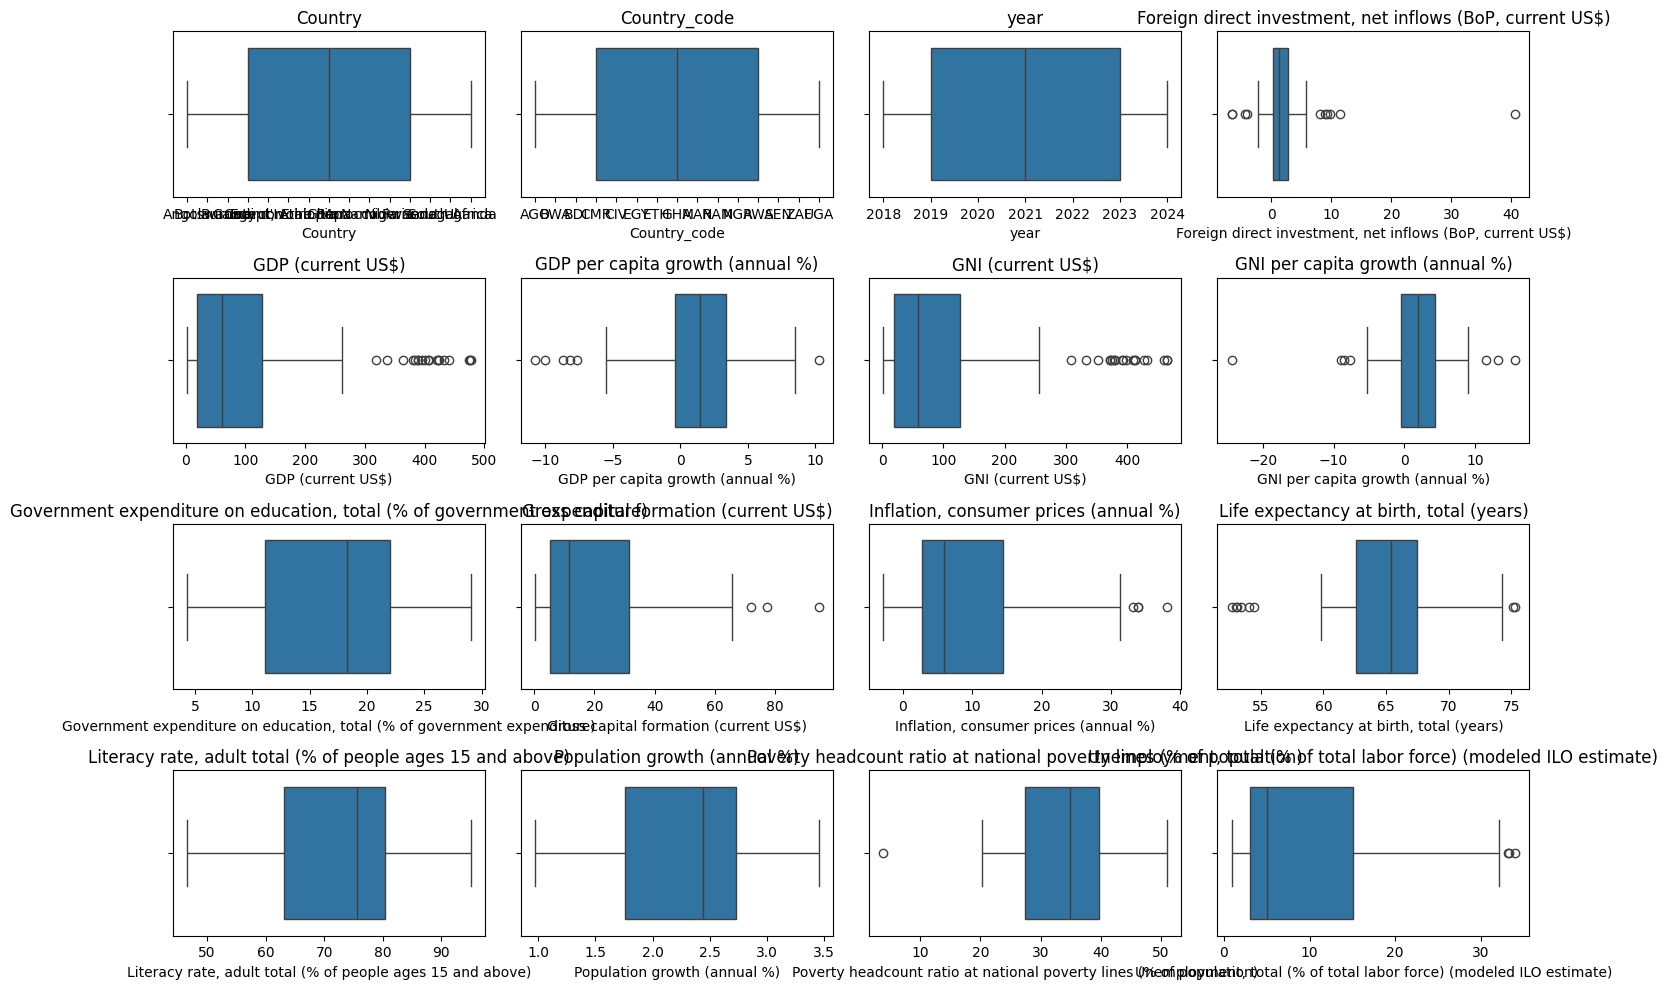

In [73]:
# distribution

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()


for i, col in enumerate(df_pivoted):
    sns.boxplot(data=df_pivoted, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Detecting Outliers

In [78]:
def outlier(x):
    x = pd.to_numeric(x, errors="coerce")  
    x = x.dropna() 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return (x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)



outlier_score = []

for col in df_pivoted:
    if pd.api.types.is_numeric_dtype(df_pivoted[col]):
        x = df_pivoted[col]
        outliers = outlier(x)
        score = outliers.mean()*100
        outlier_score.append((col, score))


result = pd.DataFrame(outlier_score, columns=['Column', 'Outlier_Percentage'])
result = result.sort_values('Outlier_Percentage', ascending=False)

result.round()

,Column,Outlier_Percentage
4,GNI (current US$),18.0
2,GDP (current US$),18.0
12,Poverty headcount ratio at national poverty li...,12.0
1,"Foreign direct investment, net inflows (BoP, c...",11.0
9,"Life expectancy at birth, total (years)",9.0
5,GNI per capita growth (annual %),7.0
3,GDP per capita growth (annual %),6.0
8,"Inflation, consumer prices (annual %)",4.0
7,Gross capital formation (current US$),3.0
13,"Unemployment, total (% of total labor force) (...",3.0


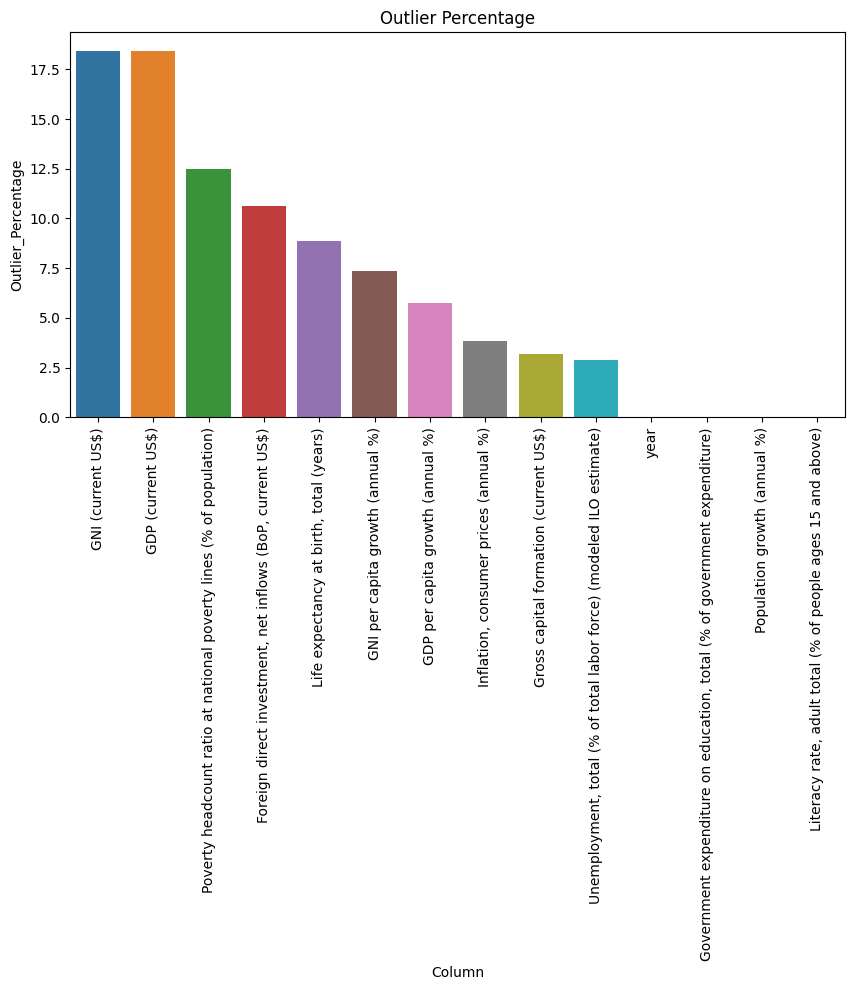

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x=result['Column'], y=result['Outlier_Percentage'], palette=sns.color_palette("tab10"))
plt.title('Outlier Percentage')
plt.xticks(rotation=90)
plt.show()

In [80]:
# Null Values

df_pivoted.isnull().sum()

Indicator name
Country                                                                      0
Country_code                                                                 0
year                                                                         0
Foreign direct investment, net inflows (BoP, current US$)                   11
GDP (current US$)                                                            2
GDP per capita growth (annual %)                                             1
GNI (current US$)                                                            2
GNI per capita growth (annual %)                                            10
Government expenditure on education, total (% of government expenditure)    26
Gross capital formation (current US$)                                       10
Inflation, consumer prices (annual %)                                        0
Life expectancy at birth, total (years)                                     15
Literacy rate, adult total (% of peop

In [81]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country                                                                   105 non-null    object 
 1   Country_code                                                              105 non-null    object 
 2   year                                                                      105 non-null    int64  
 3   Foreign direct investment, net inflows (BoP, current US$)                 94 non-null     float64
 4   GDP (current US$)                                                         103 non-null    float64
 5   GDP per capita growth (annual %)                                          104 non-null    float64
 6   GNI (current US$)                                                 

In [82]:
# Corr

corr_df = df_pivoted.corr(numeric_only=True)

corr_df.round()

Indicator name,year,"Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita growth (annual %),GNI (current US$),GNI per capita growth (annual %),"Government expenditure on education, total (% of government expenditure)",Gross capital formation (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Poverty headcount ratio at national poverty lines (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
Indicator name,,,,,,,,,,,,,,
year,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
"Foreign direct investment, net inflows (BoP, current US$)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
GDP (current US$),0.0,0.0,1.0,-0.0,1.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
GDP per capita growth (annual %),0.0,0.0,-0.0,1.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
GNI (current US$),0.0,0.0,1.0,-0.0,1.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
GNI per capita growth (annual %),0.0,0.0,-0.0,1.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
"Government expenditure on education, total (% of government expenditure)",-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
Gross capital formation (current US$),0.0,1.0,1.0,0.0,1.0,-0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-0.0,0.0
"Inflation, consumer prices (annual %)",0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0


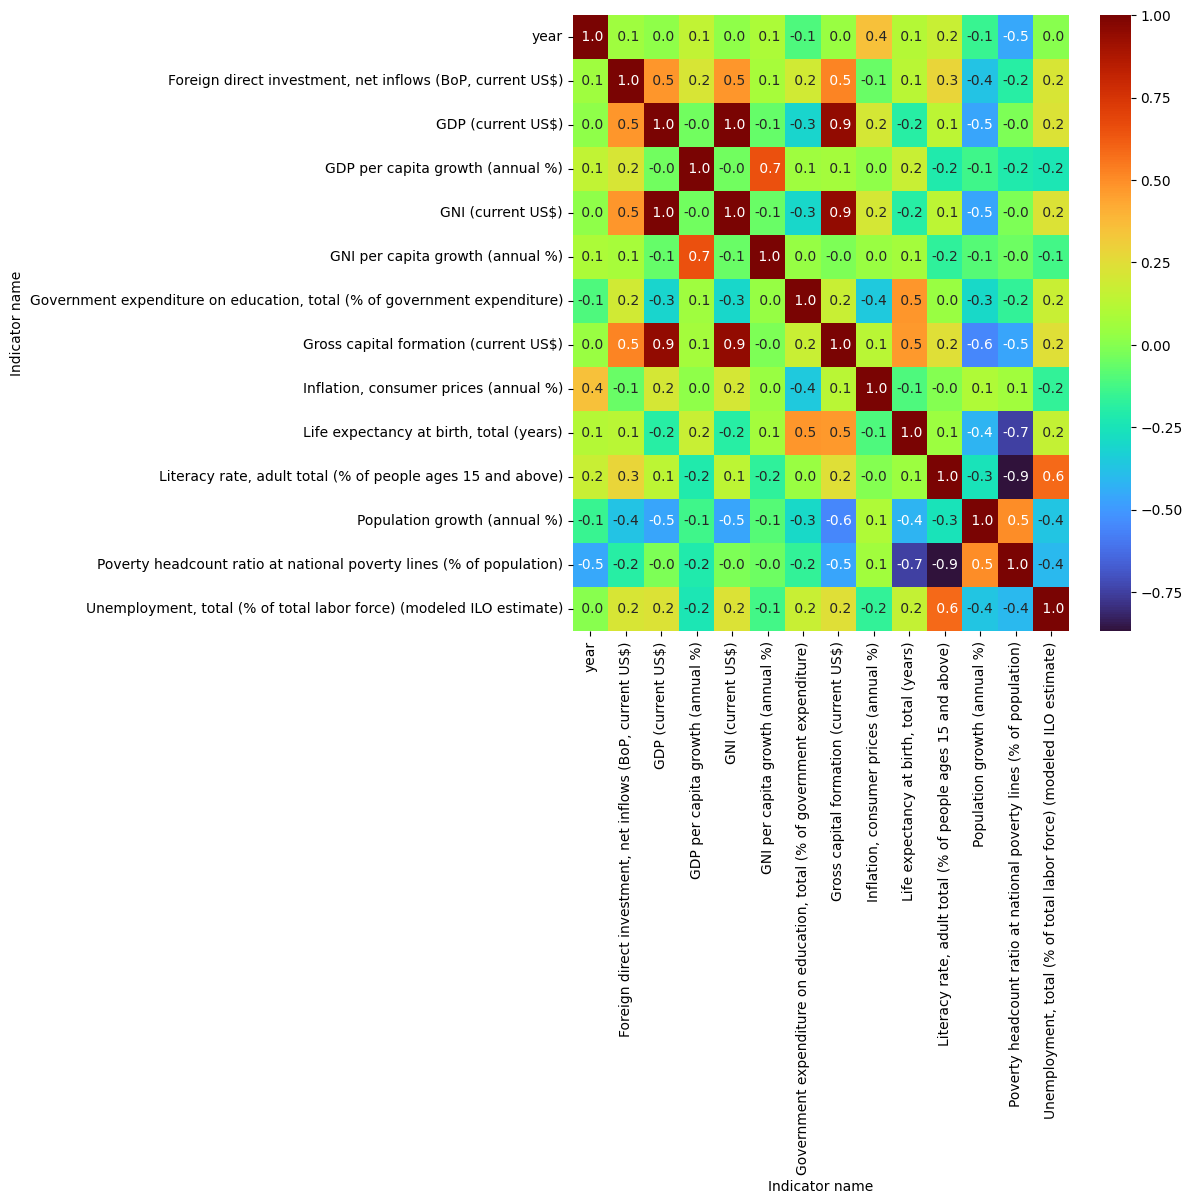

In [83]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_df, annot=True, fmt=' .1f', cmap='turbo')
plt.show()

In [85]:
life_expectancy = pd.pivot_table(data=df_pivoted, index='Country', columns='year', values='Life expectancy at birth, total (years)', aggfunc='mean').round(1)
life_expectancy

year,2018,2019,2020,2021,2022,2023
Country,,,,,,
Angola,62.6,63.1,63.1,63.0,64.2,64.6
Botswana,66.4,67.2,67.6,63.3,68.7,69.2
Burundi,61.8,62.2,62.6,62.1,62.9,63.7
Cameroon,61.2,61.7,61.7,61.1,62.4,63.7
Cote d'Ivoire,59.8,60.3,60.1,60.3,61.6,61.9
"Egypt, Arab Rep.",71.0,71.2,69.8,69.0,71.0,71.6
Ethiopia,65.3,65.7,66.0,65.3,66.9,67.3
Ghana,64.1,64.5,64.3,64.3,65.2,65.5
Morocco,73.9,74.2,73.1,73.4,75.2,75.3


In [86]:
print(life_expectancy.columns)

Index([2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='year')


In [87]:
life_expectancy['% Change'] = round((life_expectancy[2023] - life_expectancy[2018]) * 100 / life_expectancy[2018], 1)


life_expectancy.sort_values(ascending=False, by='% Change')

year,2018,2019,2020,2021,2022,2023,% Change
Country,,,,,,,
Namibia,62.6,63.5,64.1,60.8,64.2,67.4,7.7
Botswana,66.4,67.2,67.6,63.3,68.7,69.2,4.2
Cameroon,61.2,61.7,61.7,61.1,62.4,63.7,4.1
Uganda,65.8,66.4,66.4,66.4,67.7,68.3,3.8
Cote d'Ivoire,59.8,60.3,60.1,60.3,61.6,61.9,3.5
Nigeria,52.7,53.0,53.1,53.5,54.1,54.5,3.4
Angola,62.6,63.1,63.1,63.0,64.2,64.6,3.2
Burundi,61.8,62.2,62.6,62.1,62.9,63.7,3.1
Ethiopia,65.3,65.7,66.0,65.3,66.9,67.3,3.1


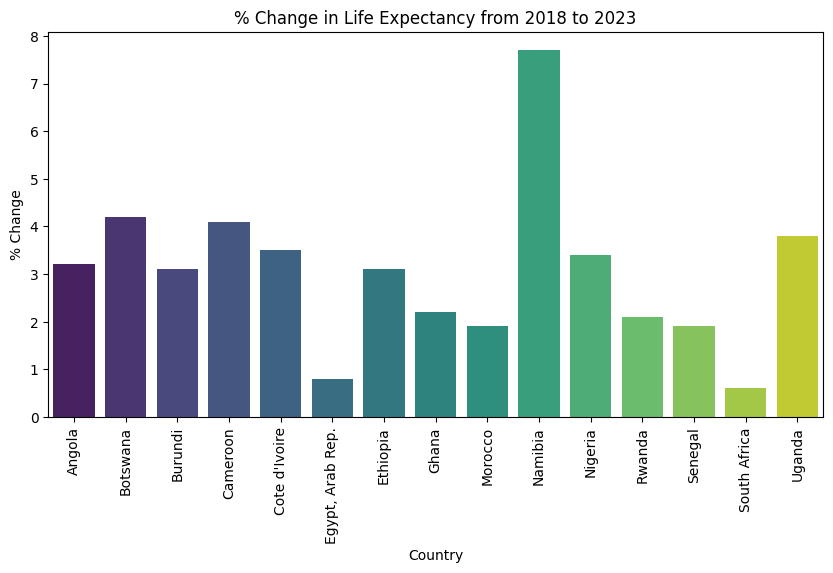

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['% Change'], palette='viridis')
plt.title('% Change in Life Expectancy from 2018 to 2023')
plt.xticks(rotation=90)
plt.show()

In [90]:
FDI = pd.pivot_table(data=df_pivoted, index='Country', columns='year', values='Foreign direct investment, net inflows (BoP, current US$)', aggfunc='mean').round(1)
FDI['% Change'] = round((FDI[2023] - FDI[2018]) * 100 / FDI[2018], 1)
FDI.sort_values(ascending=False, by='% Change')
FDI

year,2018,2019,2020,2021,2022,2023,2024,% Change
Country,,,,,,,,
Angola,-6.5,-4.1,-1.9,-4.4,-6.6,-2.1,-0.1,-67.7
Botswana,0.3,0.1,0.0,-0.3,0.7,0.7,NaN,133.3
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Cameroon,0.8,1.0,0.7,1.0,0.9,0.8,NaN,0.0
Cote d'Ivoire,0.6,0.8,0.7,1.4,1.6,1.8,NaN,200.0
"Egypt, Arab Rep.",8.1,9.0,5.9,5.1,11.4,9.8,NaN,21.0
Ethiopia,3.4,2.5,2.4,4.3,3.7,3.3,NaN,-2.9
Ghana,3.0,3.9,1.9,2.5,1.4,1.3,NaN,-56.7
Morocco,3.5,1.7,1.4,2.3,2.3,1.1,NaN,-68.6


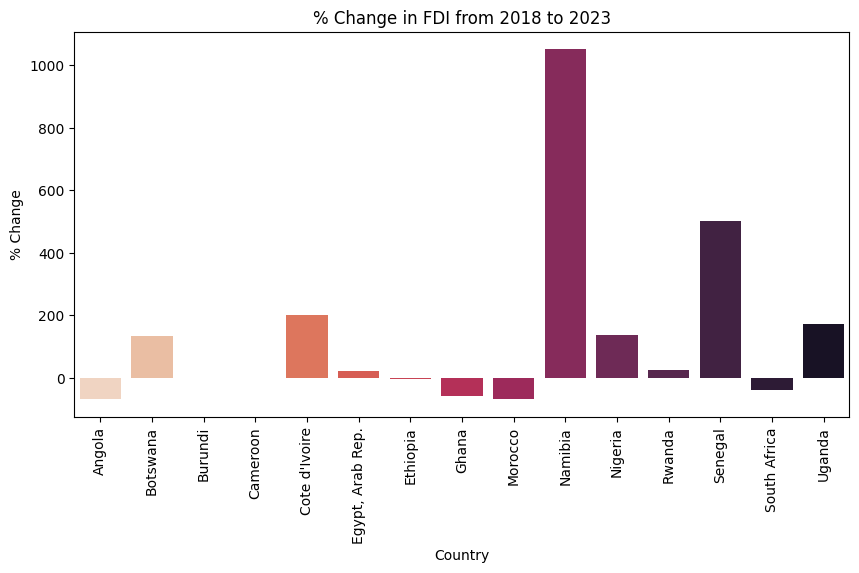

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x=FDI.index, y=FDI['% Change'], palette='rocket_r')
plt.title('% Change in FDI from 2018 to 2023')
plt.xticks(rotation=90)
plt.show()

# Nigeria

In [94]:
ng_df = ['Nigeria']
ng_df

check_df = df_melted[df_melted['Country'].isin(ng_df)]
check_df.head()

,Country_code,indicator ID,Country,Indicator name,year,value
2,NGA,FP.CPI.TOTL.ZG,Nigeria,"Inflation, consumer prices (annual %)",2018,1.209511e+01
17,NGA,SP.POP.GROW,Nigeria,Population growth (annual %),2018,2.312173e+00
32,NGA,SL.UEM.TOTL.ZS,Nigeria,"Unemployment, total (% of total labor force) (...",2018,5.067000e+00
47,NGA,SI.POV.NAHC,Nigeria,Poverty headcount ratio at national poverty li...,2018,4.010000e+01
62,NGA,NY.GDP.MKTP.CD,Nigeria,GDP (current US$),2018,4.217393e+11


In [95]:
check_df.shape

(91, 6)

In [97]:
ng_pivoted = check_df.pivot_table(
    index=['Country', 'Country_code', 'year'],
    columns='Indicator name',
    values='value'
).reset_index()

ng_pivoted 

Indicator name,Country,Country_code,year,"Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita growth (annual %),GNI (current US$),"Government expenditure on education, total (% of government expenditure)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Poverty headcount ratio at national poverty lines (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Nigeria,NGA,2018,7.752474e+08,4.217393e+11,-0.406837,4.104869e+11,5.944552,12.095107,52.669,62.01601,2.312173,40.1,5.067
1,Nigeria,NGA,2019,2.305100e+09,4.745175e+11,-0.010005,4.653565e+11,5.854972,11.396422,53.009,NaN,2.194402,NaN,5.206
2,Nigeria,NGA,2020,2.385278e+09,4.321989e+11,-3.864201,4.274319e+11,5.131437,13.246023,53.072,NaN,2.130297,NaN,5.742
3,Nigeria,NGA,2021,3.313210e+09,4.408336e+11,1.497161,4.322507e+11,5.140226,16.952846,53.455,63.15554,2.096187,NaN,5.450
4,Nigeria,NGA,2022,-1.867924e+08,4.774034e+11,1.113267,4.645308e+11,4.302818,18.847188,54.079,NaN,2.092817,NaN,3.821
5,Nigeria,NGA,2023,1.872521e+09,3.638463e+11,0.724296,3.529061e+11,4.404170,24.659550,54.462,NaN,2.098389,NaN,3.074
6,Nigeria,NGA,2024,1.080311e+09,1.877597e+11,1.294372,1.811277e+11,NaN,33.242097,NaN,NaN,2.082978,NaN,2.989


In [98]:
ng_pivoted.describe().T

,count,mean,std,min,25%,50%,75%,max
Indicator name,,,,,,,,
year,7.0,2.021000e+03,2.160247e+00,2.018000e+03,2.019500e+03,2.021000e+03,2.022500e+03,2.024000e+03
"Foreign direct investment, net inflows (BoP, current US$)",7.0,1.649268e+09,1.172541e+09,-1.867924e+08,9.277791e+08,1.872521e+09,2.345189e+09,3.313210e+09
GDP (current US$),7.0,3.997570e+11,1.008906e+11,1.877597e+11,3.927928e+11,4.321989e+11,4.576756e+11,4.774034e+11
GDP per capita growth (annual %),7.0,4.972191e-02,1.860162e+00,-3.864201e+00,-2.084208e-01,7.242957e-01,1.203820e+00,1.497161e+00
GNI (current US$),7.0,3.905844e+11,9.986710e+10,1.811277e+11,3.816965e+11,4.274319e+11,4.483908e+11,4.653565e+11
"Government expenditure on education, total (% of government expenditure)",6.0,5.129696e+00,6.928556e-01,4.302818e+00,4.585987e+00,5.135831e+00,5.676285e+00,5.944552e+00
"Inflation, consumer prices (annual %)",7.0,1.863418e+01,7.924071e+00,1.139642e+01,1.267056e+01,1.695285e+01,2.175337e+01,3.324210e+01
"Life expectancy at birth, total (years)",6.0,5.345767e+01,6.880092e-01,5.266900e+01,5.302475e+01,5.326350e+01,5.392300e+01,5.446200e+01
"Literacy rate, adult total (% of people ages 15 and above)",2.0,6.258578e+01,8.057695e-01,6.201601e+01,6.230089e+01,6.258578e+01,6.287066e+01,6.315554e+01


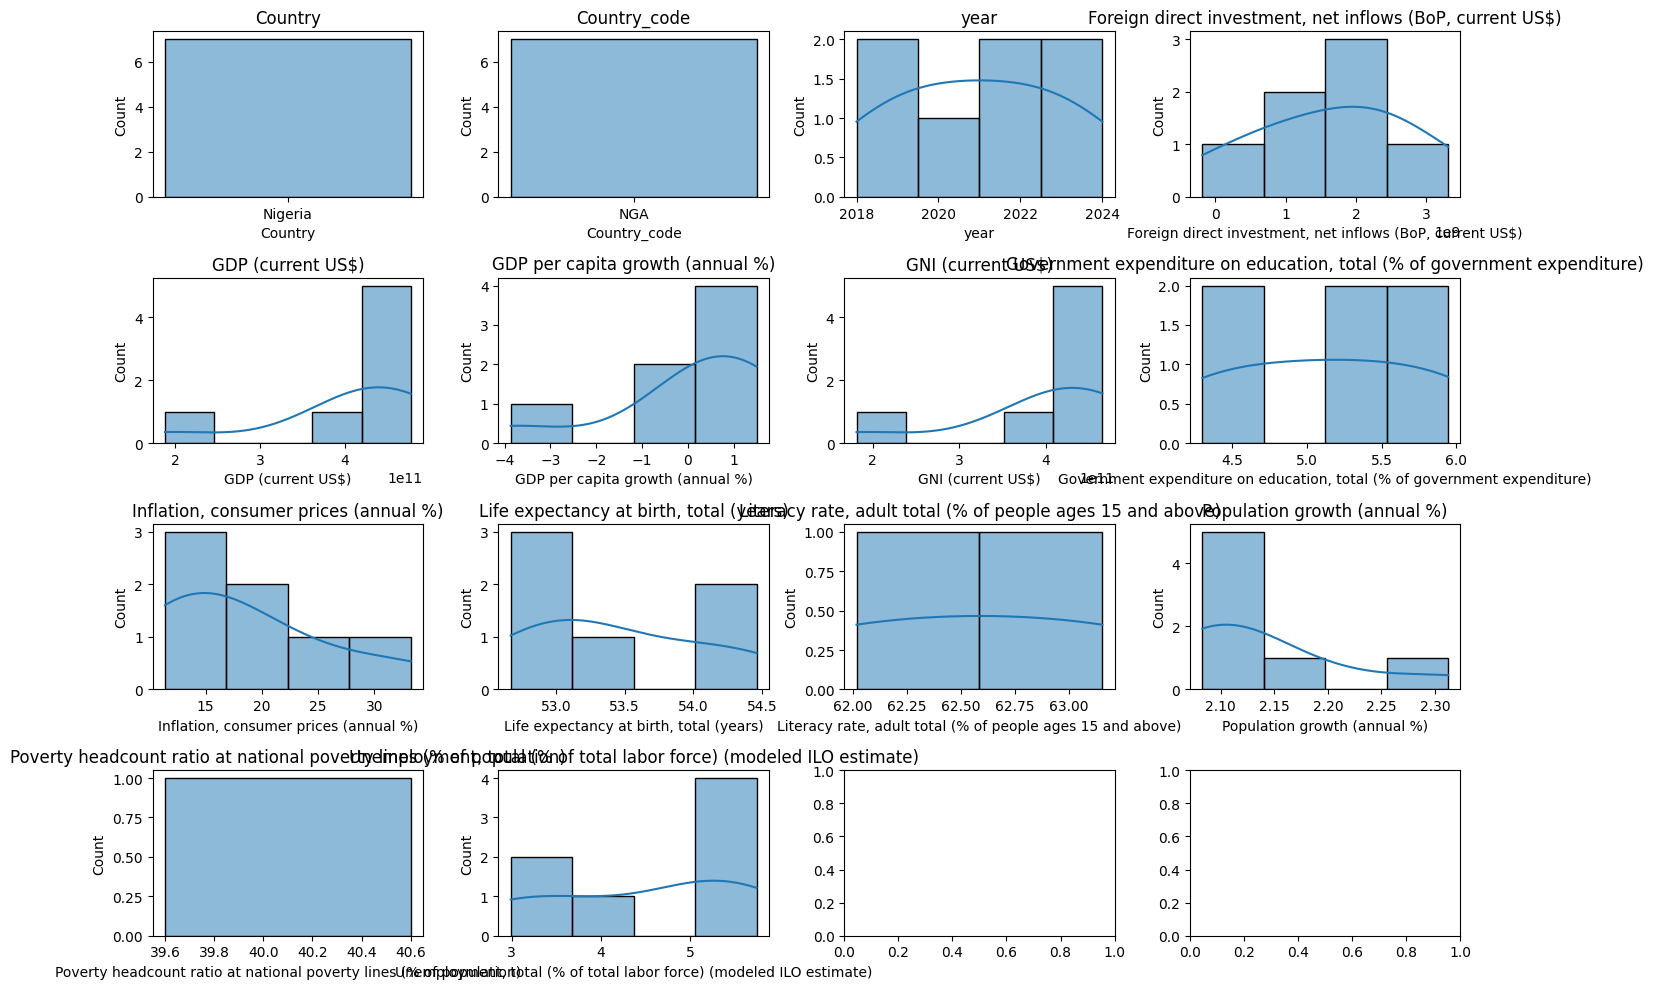

In [99]:
# distribution

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()


for i, col in enumerate(ng_pivoted):
    sns.histplot(data=ng_pivoted, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [100]:
def outlier(x):
    x = pd.to_numeric(x, errors="coerce")  
    x = x.dropna() 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return (x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)



outlier_ngscore = []

for col in ng_pivoted:
    if pd.api.types.is_numeric_dtype(ng_pivoted[col]):
        x = ng_pivoted[col]
        outliers = outlier(x)
        ng_score = outliers.mean()*100
        outlier_ngscore.append((col,  ng_score))


result = pd.DataFrame(outlier_ngscore, columns=['Column', 'Outlier_Percentage'])
result = result.sort_values('Outlier_Percentage', ascending=False)

result.round()

,Column,Outlier_Percentage
3,GDP per capita growth (annual %),14.0
2,GDP (current US$),14.0
9,Population growth (annual %),14.0
4,GNI (current US$),14.0
0,year,0.0
1,"Foreign direct investment, net inflows (BoP, c...",0.0
6,"Inflation, consumer prices (annual %)",0.0
5,"Government expenditure on education, total (% ...",0.0
7,"Life expectancy at birth, total (years)",0.0
8,"Literacy rate, adult total (% of people ages 1...",0.0


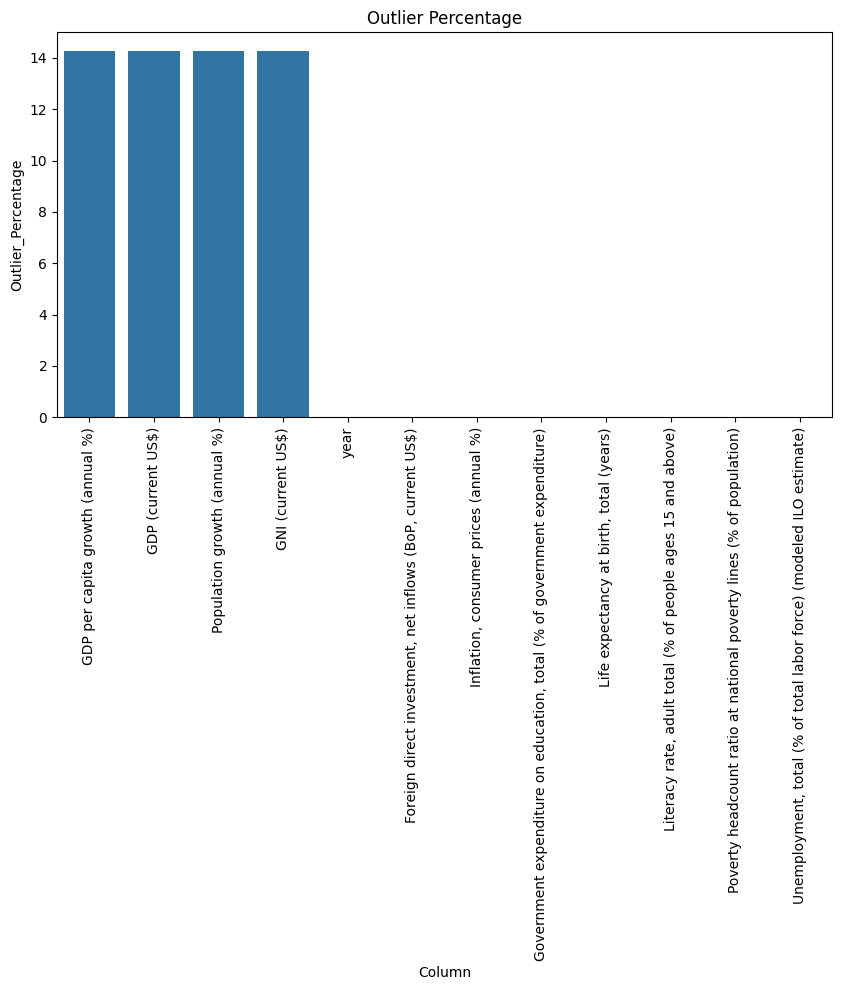

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x=result['Column'], y=result['Outlier_Percentage'])
plt.title('Outlier Percentage')
plt.xticks(rotation=90)
plt.show()

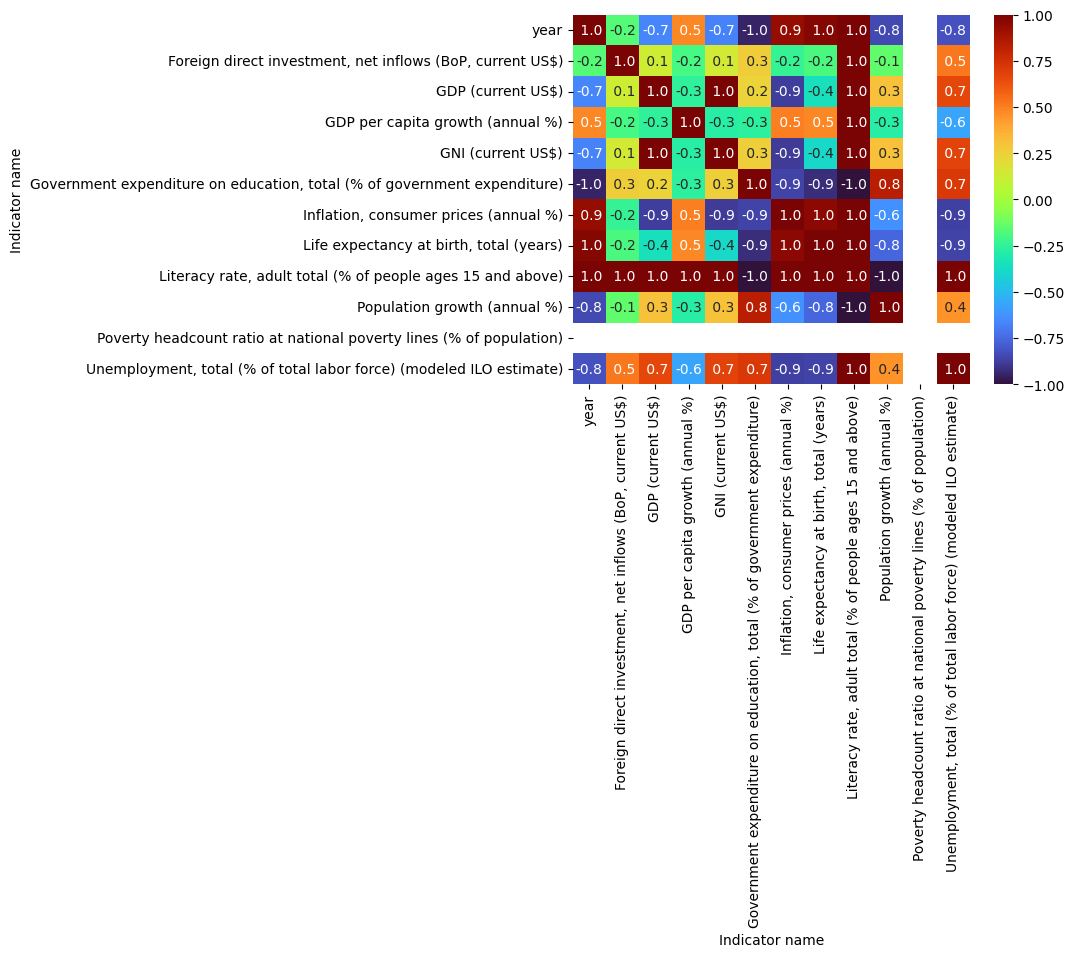

In [102]:
corr_ng_df = ng_pivoted.corr(numeric_only=True)

corr_ng_df.round()

#plt.figure(figsize=(8,8))
sns.heatmap(corr_ng_df, annot=True, fmt=' .1f', cmap='turbo')
plt.xticks(rotation=90)
plt.show()